In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle

In [2]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Activation, Dropout

In [4]:
y = keras.utils.to_categorical(y, num_classes=3, dtype="int32")

In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(3, activation="softmax"))

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [10]:
history = model.fit(x, y, batch_size=64, validation_split=0.15, epochs=10)

Epoch 1/10
30/30 [==============================] - 6s 203ms/step - loss: 1.1048 - accuracy: 0.3662 - val_loss: 1.0522 - val_accuracy: 0.5258
Epoch 2/10
30/30 [==============================] - 6s 198ms/step - loss: 1.0216 - accuracy: 0.5150 - val_loss: 0.7966 - val_accuracy: 0.7690
Epoch 3/10
30/30 [==============================] - 6s 201ms/step - loss: 0.7571 - accuracy: 0.7134 - val_loss: 0.5307 - val_accuracy: 0.8328
Epoch 4/10
30/30 [==============================] - 6s 199ms/step - loss: 0.5378 - accuracy: 0.8093 - val_loss: 0.4071 - val_accuracy: 0.8693
Epoch 5/10
30/30 [==============================] - 6s 201ms/step - loss: 0.3873 - accuracy: 0.8664 - val_loss: 0.3218 - val_accuracy: 0.9058
Epoch 6/10
30/30 [==============================] - 6s 201ms/step - loss: 0.3248 - accuracy: 0.8952 - val_loss: 0.2609 - val_accuracy: 0.9271
Epoch 7/10
30/30 [==============================] - 6s 205ms/step - loss: 0.2694 - accuracy: 0.9119 - val_loss: 0.2300 - val_accuracy: 0.9301
Epoch 

In [11]:
import matplotlib.pyplot as plt

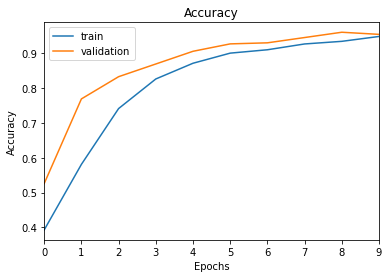

In [15]:
labels = ['train','validation']

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.xlim(0,9)

plt.legend(labels=labels)

plt.show()

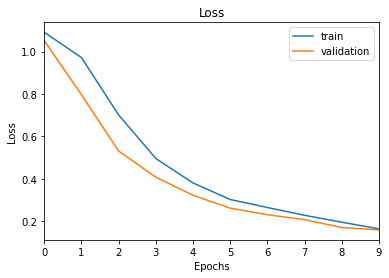

In [16]:
labels = ['train','validation']

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.xlim(0,9)

plt.legend(labels=labels)

plt.show()

In [17]:
model.save('CNN-rps.nn')

INFO:tensorflow:Assets written to: CNN-rps.nn\assets
